## Creating Priority Queue Class

In [1]:
class PriorityQueue(object): #borrowed from geeks for geeks then modified heavily
    def __init__(self):
        self.queue = []
 
    def __str__(self):
        return ' '.join([str(i) for i in self.queue])
    
    def printQueue(self):
        print(self.queue)
    
    def returnLen(self):
        return len(self.queue)
        
    # for checking if the queue is empty
    def isEmpty(self):
        return len(self.queue) == 0
    
    def doesDataExist(self, data):
        for li in self.queue:
            if li[1] == data:
                return True
        return False
    
    def updatePriority(self, priority, data):
        if self.doesDataExist(data) == False:
            return
        for i in range(len(self.queue)):
            if self.queue[i][1] == data:
                self.queue[i][0] = priority
                return
 
    # for inserting an element in the queue
    def insert(self, priority, data): 
        li = [priority, data]
        self.queue.append(li)
 
    # for popping an element based on Priority
    def delete(self):
        try:
            min_val = 0
            for i in range(len(self.queue)):
                if self.queue[i][0] < self.queue[min_val][0]:
                    min_val = i
            item = self.queue[min_val][1]
            del self.queue[min_val]
            return item
        except IndexError:
            print()
            exit()

## Creating Adj Mat Graph and Dijkstra's algorithm

In [2]:
import sys
import numpy as np
 
class AdjMatGraph(): #adj mat format
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
        self.dist = None
        self.prev = None
        self.accessCnt = None
        
    def printSolution(self):
        print("Vertex \tPrevious \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", self.prev[node], "\t \t", self.dist[node])
        
    
    def printGraphInfo(self):
        print("Number of vertices: \t\t", self.V)
        print("Number of edges: \t\t", np.count_nonzero(self.graph))
        print("Number of matrix accesses: \t", self.accessCnt)
        
    def getVEA(self):
        
        return self.V, np.count_nonzero(self.graph), self.accessCnt
        
    def dijkstra(self, src):
        accessCnt = 0 # count the number of times the matrix is assessed
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        prev = [-1] * self.V
        visited = [False] * self.V
        pq = PriorityQueue()
        pq.insert(0, src)
        while not pq.isEmpty():
            u = pq.delete()
            visited[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and visited[v] == False:
                    if dist[v] > dist[u] + self.graph[u][v]:
                        dist[v] = dist[u] + self.graph[u][v]
                        prev[v] = u
                        accessCnt += 2
                    else:
                        accessCnt += 1
                        
                    if(pq.doesDataExist(v)):
                        pq.updatePriority(dist[v], v)
                    else:
                        pq.insert(dist[v], v)

                    accessCnt += 2
                else: 
                    accessCnt += 1
        
        self.dist = dist
        self.prev = prev
        self.accessCnt = accessCnt

## Testing algorithm

In [3]:
g = AdjMatGraph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
          ]
g.dijkstra(0)
g.printSolution()
g.printGraphInfo()

Vertex 	Previous 	Distance from Source
0 	 -1 	 	 0
1 	 0 	 	 4
2 	 1 	 	 12
3 	 2 	 	 19
4 	 5 	 	 21
5 	 6 	 	 11
6 	 7 	 	 9
7 	 0 	 	 8
8 	 2 	 	 14
Number of vertices: 		 9
Number of edges: 		 28
Number of matrix accesses: 	 119


## Creating and testing a random Adj Mat Graph Gen

In [4]:
import random as rd

def randomAdjMatGraphGen(vertices, edges, dist): 
    #note that edges mean max random no.of edges exiting a source vertex
    #note that dist mean max dist from source vertex to destination vertex
    if vertices < 1 or edges < 1 or dist < 1:
        print("randomAdjMatGraphGen() has encountered an error!")
        
    arr = []
    for i in range(vertices):
        li = [0] * vertices
        for j in range(rd.randint(1, edges)):
            r = rd.randint(0, vertices - 1)
            while r == i:
                r = rd.randint(0, vertices - 1)
            li[r] = rd.randint(1, dist)
        arr.append(li)
    return arr

In [5]:
g = AdjMatGraph(10)
g.graph = randomAdjMatGraphGen(10, 3, 10)
print(g.graph)
g.dijkstra(0)
g.printSolution()
g.printGraphInfo()

[[0, 0, 0, 0, 8, 0, 4, 5, 0, 0], [0, 0, 0, 0, 0, 0, 10, 0, 0, 0], [6, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 0, 0, 0], [10, 0, 0, 0, 0, 8, 0, 0, 0, 0], [0, 9, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 0, 5, 0, 0, 0, 1, 5], [10, 8, 0, 3, 0, 0, 0, 0, 0, 0], [0, 8, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 0, 0]]
Vertex 	Previous 	Distance from Source
0 	 -1 	 	 0
1 	 7 	 	 13
2 	 9 	 	 10
3 	 8 	 	 6
4 	 0 	 	 8
5 	 9 	 	 10
6 	 0 	 	 4
7 	 0 	 	 5
8 	 6 	 	 5
9 	 6 	 	 9
Number of vertices: 		 10
Number of edges: 		 21
Number of matrix accesses: 	 141


## Creating an Adj List Graph

In [6]:
import heapq

class AdjListGraph(): #adj list format
    def __init__(self, vertices):
        self.V = vertices
        self.graph = None
#       graph = {0: [[dist, node], [dist, node], [dist, node],...],
#                1: [[dist, node], [dist, node], [dist, node],...],
#                2: [[dist, node], [dist, node], [dist, node],...],
#                ...
#               }
        self.dist = None
        self.prev = None
        self.accessCnt = None
        self.edges = None

    def printSolution(self):
        print("Vertex \tPrevious \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", self.prev[node], "\t \t", self.dist[node])
    
    def printGraphInfo(self):
        print("Number of vertices: \t\t", self.V)
        cnt = 0
        for i in self.graph:
            cnt += len(self.graph[i])
        print("Number of edges: \t\t", cnt)
        print("Number of matrix accesses: \t", self.accessCnt)
        
    def getVEA(self):
        return self.V, self.edges, self.accessCnt
        
    def dijkstra(self, src):
        accessCnt = 0 # count the number of times the adj list is assessed
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        prev = [-1] * self.V
        visited = [False] * self.V
        pq = [] #it should contain [dist, node], heapify based on dist
        pq.append([src, 0])
        while pq:
            u = pq.pop(0)[1]
            visited[u] = True
            for v in self.graph[u]: # v = [dist, node]-> [dist, node]->... v represents adj nodes and their distances originating from node u
                if visited[v[1]] == False:
                    if dist[v[1]] > dist[u] + v[0]:
                        dist[v[1]] = dist[u] + v[0]
                        prev[v[1]] = u
                        accessCnt += 5
                    
                    else:
                        accessCnt += 2
                        
                    dne = True
                    for i in range(len(pq)):
                        if pq[i][1] == v[1]:
                            dne = False
                            pq[i][0] = dist[v[1]]
                            heapq.heapify(pq)
                            accessCnt += 2
                        
                        else:
                            accessCnt += 1
                            
                    if dne == True:
                        pq.append([dist[v[1]] , v[1]]) # if node doesn't exist in pq, append, else update in pq
                        heapq.heapify(pq)
                        accessCnt += 2
        
        cnt = 0
        for i in self.graph:
            cnt += len(self.graph[i])
        self.edges = cnt
        self.dist = dist
        self.prev = prev
        self.accessCnt = accessCnt

In [7]:
g = AdjListGraph(9)
g.graph = {0: [[4, 1], [8, 7]],
           1: [[4, 0], [8, 2], [11, 7]],
           2: [[8, 1], [7, 3], [4, 5], [2, 8]],
           3: [[7, 2], [9, 4], [14, 5]],
           4: [[9, 3], [10, 5]],
           5: [[4, 2], [14, 3], [10, 4], [2, 6]],
           6: [[2, 5], [1, 7], [6, 8]],
           7: [[8, 0], [11, 1], [1, 6], [7, 8]],
           8: [[2, 2], [6, 6], [7, 7]]
          }
g.dijkstra(0)
g.printSolution()
g.printGraphInfo()

Vertex 	Previous 	Distance from Source
0 	 -1 	 	 0
1 	 0 	 	 4
2 	 1 	 	 12
3 	 2 	 	 19
4 	 5 	 	 21
5 	 6 	 	 11
6 	 7 	 	 9
7 	 0 	 	 8
8 	 2 	 	 14
Number of vertices: 		 9
Number of edges: 		 28
Number of matrix accesses: 	 106


## Creating and testing another random graph gen for Adj List

In [8]:
def randomAdjListGraphGen(vertices, edges, dist):
    #note that edges mean max random no.of edges exiting a source vertex
    #note that dist mean max dist from source vertex to destination vertex
    if vertices < 1 or edges < 1 or dist < 1:
        print("randomAdjListGraphGen() has encountered an error!")
    
#     arr = dict(zip(key, list of adj nodes and dist))
    key = [i for i in range(vertices)]
    twoDArr = []
#     [[],
#      [],
#      [],
#      ...
#     ]
    for i in range(vertices):
        oneDArr = []
        for j in range(rd.randint(1, edges)):
            li = [rd.randint(1, dist)]
            k = rd.randint(0, vertices - 1)
            while k == i: 
                k = rd.randint(0, vertices - 1)
            li.append(k)
            oneDArr.append(li)
        twoDArr.append(oneDArr)
    return dict(zip(key, twoDArr))
    

In [9]:
g = AdjListGraph(10)
g.graph = randomAdjListGraphGen(10, 3, 10)
print(g.graph)
g.dijkstra(0)
g.printSolution()
g.printGraphInfo()

{0: [[5, 3], [1, 3], [1, 2]], 1: [[5, 7], [1, 7], [3, 7]], 2: [[4, 4], [7, 4], [9, 1]], 3: [[6, 4], [8, 9]], 4: [[9, 2], [2, 6]], 5: [[6, 1], [4, 3]], 6: [[1, 9], [1, 2]], 7: [[6, 5], [7, 1]], 8: [[3, 0]], 9: [[4, 3], [10, 3], [2, 3]]}
Vertex 	Previous 	Distance from Source
0 	 -1 	 	 0
1 	 2 	 	 10
2 	 0 	 	 1
3 	 0 	 	 1
4 	 2 	 	 5
5 	 7 	 	 17
6 	 4 	 	 7
7 	 1 	 	 11
8 	 -1 	 	 9223372036854775807
9 	 6 	 	 8
Number of vertices: 		 10
Number of edges: 		 23
Number of matrix accesses: 	 100


## Everything necessary has been created. Review below

In [10]:
g = AdjMatGraph(10) # 10 vertices
g.graph = randomAdjMatGraphGen(10, 3, 5) #10 vertices, 3 edges max extending from node, dist is 5 units long
print(g.graph)
g.dijkstra(0)
g.printSolution()
g.printGraphInfo()

print()
print()

g = AdjListGraph(10)
g.graph = randomAdjListGraphGen(10, 3, 5)
print(g.graph)
g.dijkstra(0)
g.printSolution()
g.printGraphInfo()

[[0, 0, 0, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 1, 0, 0, 2, 0, 3, 0], [0, 5, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 5, 4, 0, 0], [4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 0, 0, 0], [3, 0, 0, 0, 0, 0, 0, 0, 2, 0], [0, 0, 5, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 4, 0, 2, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0]]
Vertex 	Previous 	Distance from Source
0 	 -1 	 	 0
1 	 2 	 	 17
2 	 7 	 	 12
3 	 5 	 	 14
4 	 -1 	 	 9223372036854775807
5 	 8 	 	 9
6 	 0 	 	 3
7 	 8 	 	 7
8 	 6 	 	 5
9 	 -1 	 	 9223372036854775807
Number of vertices: 		 10
Number of edges: 		 16
Number of matrix accesses: 	 101


{0: [[2, 7]], 1: [[2, 2], [5, 9], [3, 2]], 2: [[5, 3]], 3: [[3, 5], [3, 9], [5, 6]], 4: [[3, 1], [1, 0]], 5: [[3, 3], [1, 8]], 6: [[5, 3], [2, 7], [3, 4]], 7: [[2, 6], [2, 9], [5, 9]], 8: [[1, 1], [4, 2], [3, 1]], 9: [[5, 0], [3, 6], [5, 7]]}
Vertex 	Previous 	Distance from Source
0 	 -1 	 	 0
1 	 4 	 	 10
2 	 1 	 	 12
3 	 6 	 	 9
4 	 6 	 	 7
5 	 3 	 	 12
6 	 7 	 	 4
7 	 0 	 	 2
8 	 5 	 	 13

## Time to test. First, for graphs with "too many" edges

In [21]:
# first is to test a graph with "too many" edges. set vertices to n, edges to 20
# second is to test a graph with "too few" edges. set vertices to n, edges to 3

#then draw graph plotting accesses to vertices and accesses to edges

adjMatAccessesList = []
adjMatVerticesList = []
adjMatEdgesList = []

for i in range(2,101):
    for j in range(5):
        g = AdjMatGraph(i)
        g.graph = randomAdjMatGraphGen(i, 20, 10)
        g.dijkstra(0)
        v, e, a = g.getVEA()
        adjMatAccessesList.append(a)
        adjMatVerticesList.append(v)
        adjMatEdgesList.append(e)
    
print(adjMatAccessesList)
print(adjMatVerticesList)
print(adjMatEdgesList)
print()
print()

adjListAccessesList = []
adjListVerticesList = []
adjListEdgesList = []

for i in range(2,101):
    for j in range(5):
        g = AdjListGraph(i)
        g.graph = randomAdjListGraphGen(i, 20, 10)
        g.dijkstra(0)
        v, e, a = g.getVEA()
        adjListAccessesList.append(a)
        adjListVerticesList.append(v)
        adjListEdgesList.append(e)
    
print(adjListAccessesList)
print(adjListVerticesList)
print(adjListEdgesList)

[7, 7, 7, 7, 7, 18, 17, 17, 17, 17, 32, 33, 28, 29, 31, 50, 44, 42, 45, 37, 65, 71, 60, 72, 63, 88, 98, 87, 88, 96, 105, 126, 112, 119, 105, 146, 134, 143, 145, 149, 177, 185, 172, 179, 162, 218, 199, 201, 197, 197, 237, 242, 230, 244, 240, 276, 278, 257, 280, 253, 305, 306, 294, 321, 304, 334, 319, 333, 320, 371, 407, 367, 369, 391, 415, 423, 436, 429, 454, 445, 501, 477, 505, 429, 475, 506, 551, 500, 510, 549, 586, 564, 589, 596, 603, 666, 609, 636, 612, 621, 675, 699, 671, 664, 700, 754, 686, 774, 713, 763, 799, 785, 832, 824, 851, 866, 903, 856, 868, 818, 938, 941, 950, 899, 939, 937, 987, 1003, 1000, 1000, 1058, 996, 1080, 1043, 1031, 1132, 1161, 1122, 1104, 1142, 1205, 1182, 1240, 1241, 1182, 1329, 1270, 1328, 1270, 1326, 1352, 1367, 1310, 1330, 1269, 1412, 1479, 1471, 1341, 1358, 1472, 1514, 1475, 1490, 1561, 1582, 1609, 1514, 1597, 1555, 1665, 1697, 1663, 1653, 1664, 1786, 1754, 1780, 1753, 1781, 1815, 1856, 1881, 1854, 1849, 1918, 1873, 1966, 1950, 1899, 2062, 2021, 2064, 2029

Correlation: 0.9755150760911081


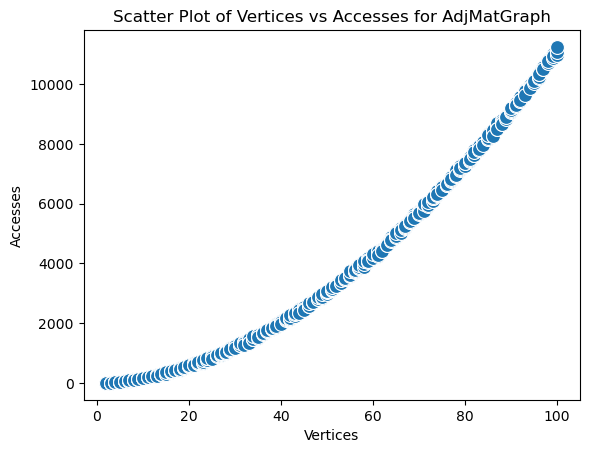

Correlation: 0.9723230816926374


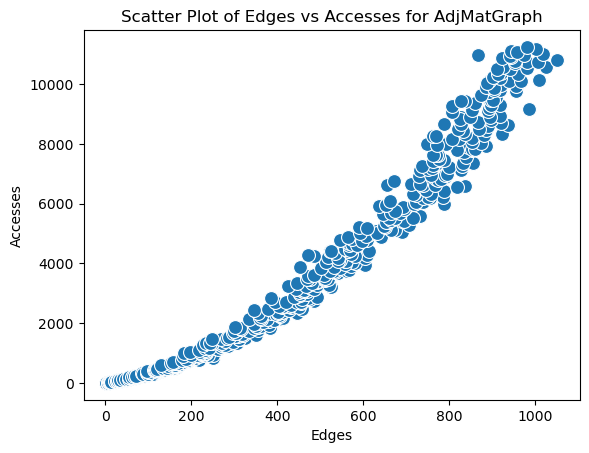

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

pd_key_comp = pd.DataFrame({'vertices': adjMatVerticesList, 'accesses': adjMatAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='vertices', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Vertices vs Accesses for AdjMatGraph')
plt.xlabel('Vertices')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['vertices'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

plt.show()

pd_key_comp = pd.DataFrame({'edges': adjMatEdgesList, 'accesses': adjMatAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='edges', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Edges vs Accesses for AdjMatGraph')
plt.xlabel('Edges')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['edges'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

Correlation: 0.9628096248222696


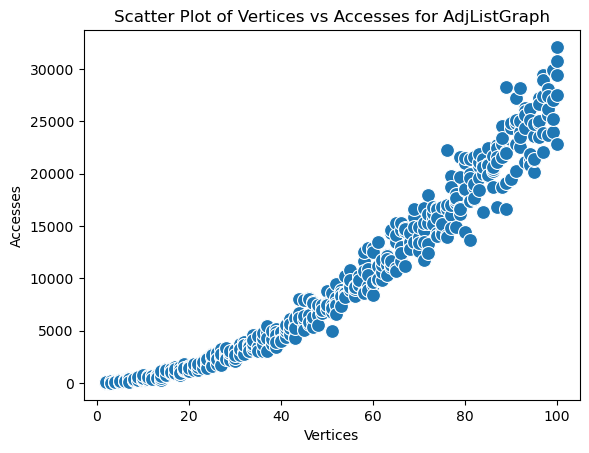

Correlation: 0.9666313550853232


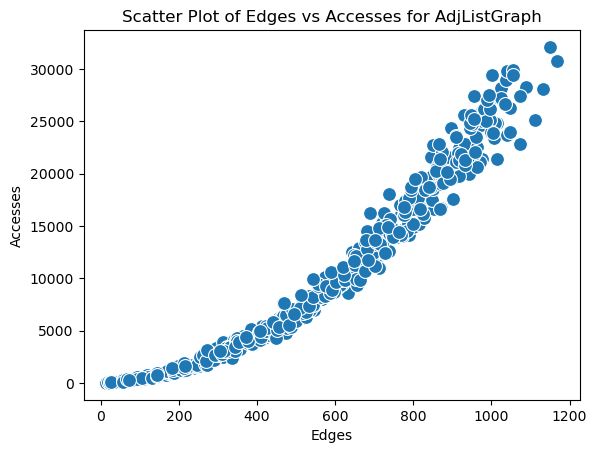

In [23]:
#printing for adjListGraph

pd_key_comp = pd.DataFrame({'vertices': adjListVerticesList, 'accesses': adjListAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='vertices', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Vertices vs Accesses for AdjListGraph')
plt.xlabel('Vertices')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['vertices'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

plt.show()

pd_key_comp = pd.DataFrame({'edges': adjListEdgesList, 'accesses': adjListAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='edges', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Edges vs Accesses for AdjListGraph')
plt.xlabel('Edges')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['edges'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

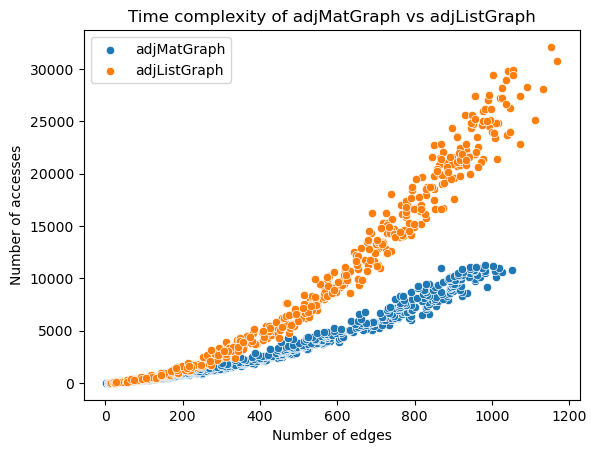

In [24]:
# Create DataFrames for listA and listB
dataA = {'A1': adjMatEdgesList, 'A2': adjMatAccessesList}
dataB = {'B1': adjListEdgesList, 'B2': adjListAccessesList}
dfA = pd.DataFrame(dataA)
dfB = pd.DataFrame(dataB)

# Create scatterplots for each DataFrame
sns.scatterplot(data=dfA, x='A1', y='A2', label='adjMatGraph')
sns.scatterplot(data=dfB, x='B1', y='B2', label='adjListGraph')

# Add labels, legend, and title
plt.xlabel('Number of edges')
plt.ylabel('Number of accesses')
plt.legend()
plt.title('Time complexity of adjMatGraph vs adjListGraph')

plt.show()

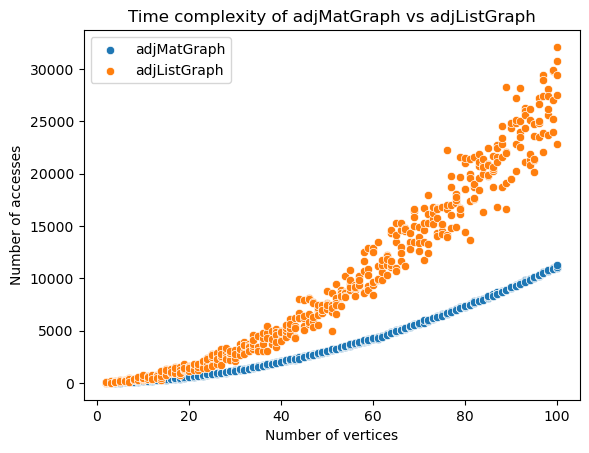

In [25]:
# Create DataFrames for listA and listB
dataA = {'A1': adjMatVerticesList, 'A2': adjMatAccessesList}
dataB = {'B1': adjListVerticesList, 'B2': adjListAccessesList}
dfA = pd.DataFrame(dataA)
dfB = pd.DataFrame(dataB)

# Create scatterplots for each DataFrame
sns.scatterplot(data=dfA, x='A1', y='A2', label='adjMatGraph')
sns.scatterplot(data=dfB, x='B1', y='B2', label='adjListGraph')

# Add labels, legend, and title
plt.xlabel('Number of vertices')
plt.ylabel('Number of accesses')
plt.legend()
plt.title('Time complexity of adjMatGraph vs adjListGraph')

plt.show()

## Time to test for graphs with "too little" edges

In [16]:
adjMatAccessesList = []
adjMatVerticesList = []
adjMatEdgesList = []

for i in range(2,101):
    for j in range(5):
        g = AdjMatGraph(i)
        g.graph = randomAdjMatGraphGen(i, 3, 10)
        g.dijkstra(0)
        v, e, a = g.getVEA()
        adjMatAccessesList.append(a)
        adjMatVerticesList.append(v)
        adjMatEdgesList.append(e)
    
print(adjMatAccessesList)
print(adjMatVerticesList)
print(adjMatEdgesList)
print()
print()

adjListAccessesList = []
adjListVerticesList = []
adjListEdgesList = []

for i in range(2,101):
    for j in range(5):
        g = AdjListGraph(i)
        g.graph = randomAdjListGraphGen(i, 3, 10)
        g.dijkstra(0)
        v, e, a = g.getVEA()
        adjListAccessesList.append(a)
        adjListVerticesList.append(v)
        adjListEdgesList.append(e)
    
print(adjListAccessesList)
print(adjListVerticesList)
print(adjListEdgesList)

[7, 7, 7, 7, 7, 15, 15, 9, 15, 15, 27, 21, 25, 28, 25, 37, 41, 39, 37, 21, 42, 51, 44, 45, 51, 40, 59, 69, 59, 54, 90, 76, 89, 81, 74, 93, 71, 110, 59, 107, 121, 134, 122, 120, 39, 81, 142, 111, 97, 125, 134, 155, 166, 117, 157, 176, 194, 98, 181, 212, 209, 85, 228, 226, 230, 195, 234, 177, 201, 248, 293, 277, 269, 259, 227, 286, 350, 321, 324, 240, 272, 60, 276, 39, 382, 335, 409, 173, 309, 315, 257, 296, 403, 423, 421, 315, 357, 470, 386, 368, 426, 300, 324, 479, 353, 524, 426, 426, 495, 366, 572, 578, 492, 630, 465, 680, 630, 546, 423, 569, 550, 619, 614, 641, 643, 237, 730, 717, 646, 578, 691, 689, 593, 723, 787, 642, 781, 639, 718, 839, 862, 871, 661, 639, 529, 995, 850, 923, 998, 821, 1019, 920, 910, 985, 813, 911, 986, 658, 1097, 801, 1010, 1216, 1196, 893, 1128, 1063, 1153, 1034, 1285, 768, 1135, 1143, 1100, 1222, 1230, 1297, 1421, 1242, 1296, 1215, 1284, 1286, 1283, 1197, 1109, 1434, 1568, 1013, 1144, 1306, 1356, 1301, 1384, 1303, 1346, 1329, 1521, 975, 1338, 1325, 1587, 1785,

Correlation: 0.958067950511808


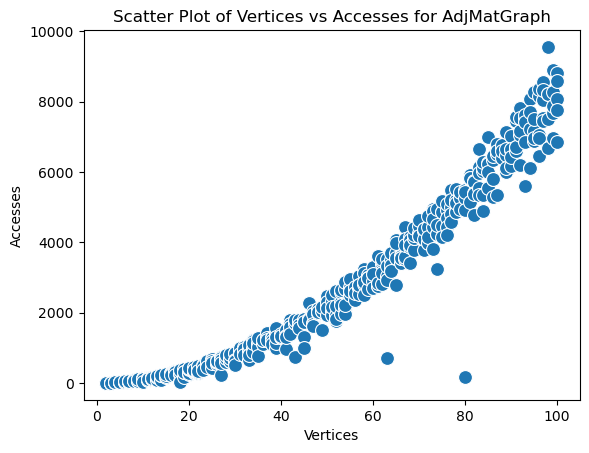

Correlation: 0.9571256257968741


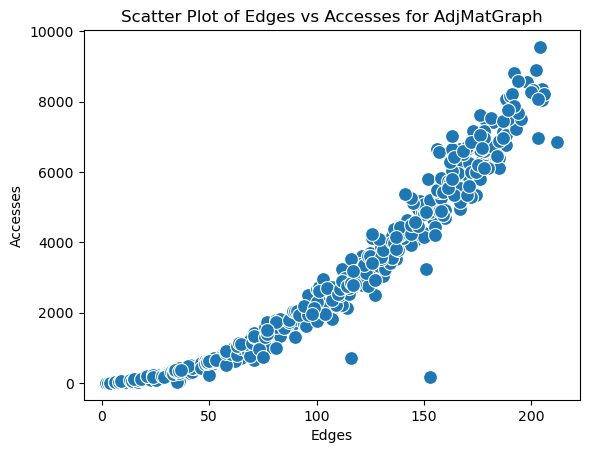

In [17]:
pd_key_comp = pd.DataFrame({'vertices': adjMatVerticesList, 'accesses': adjMatAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='vertices', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Vertices vs Accesses for AdjMatGraph')
plt.xlabel('Vertices')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['vertices'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

plt.show()

pd_key_comp = pd.DataFrame({'edges': adjMatEdgesList, 'accesses': adjMatAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='edges', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Edges vs Accesses for AdjMatGraph')
plt.xlabel('Edges')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['edges'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

Correlation: 0.9259733324705294


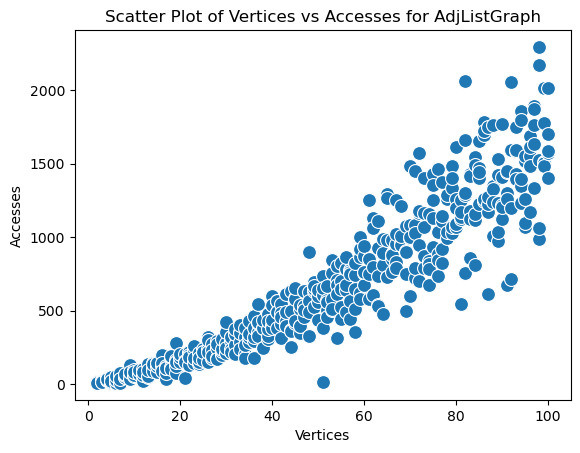

Correlation: 0.9407967680370605


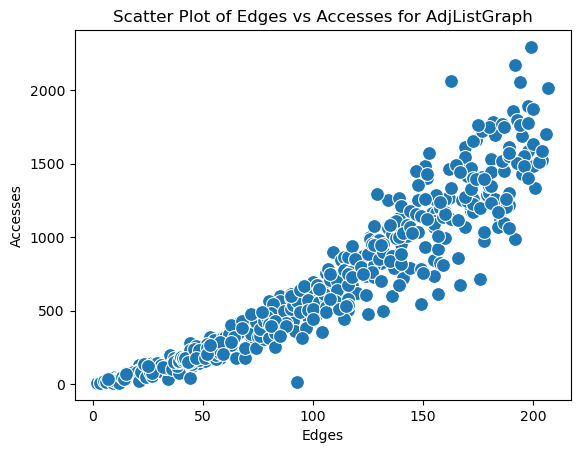

In [18]:
pd_key_comp = pd.DataFrame({'vertices': adjListVerticesList, 'accesses': adjListAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='vertices', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Vertices vs Accesses for AdjListGraph')
plt.xlabel('Vertices')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['vertices'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

plt.show()

pd_key_comp = pd.DataFrame({'edges': adjListEdgesList, 'accesses': adjListAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='edges', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Edges vs Accesses for AdjListGraph')
plt.xlabel('Edges')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['edges'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

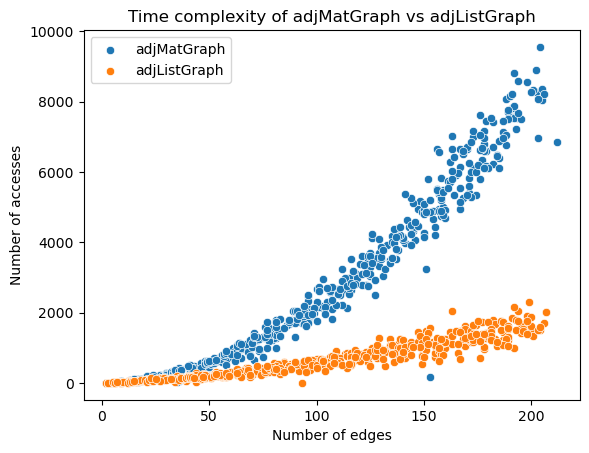

In [19]:
# Create DataFrames for listA and listB
dataA = {'A1': adjMatEdgesList, 'A2': adjMatAccessesList}
dataB = {'B1': adjListEdgesList, 'B2': adjListAccessesList}
dfA = pd.DataFrame(dataA)
dfB = pd.DataFrame(dataB)

# Create scatterplots for each DataFrame
sns.scatterplot(data=dfA, x='A1', y='A2', label='adjMatGraph')
sns.scatterplot(data=dfB, x='B1', y='B2', label='adjListGraph')

# Add labels, legend, and title
plt.xlabel('Number of edges')
plt.ylabel('Number of accesses')
plt.legend()
plt.title('Time complexity of adjMatGraph vs adjListGraph')

plt.show()

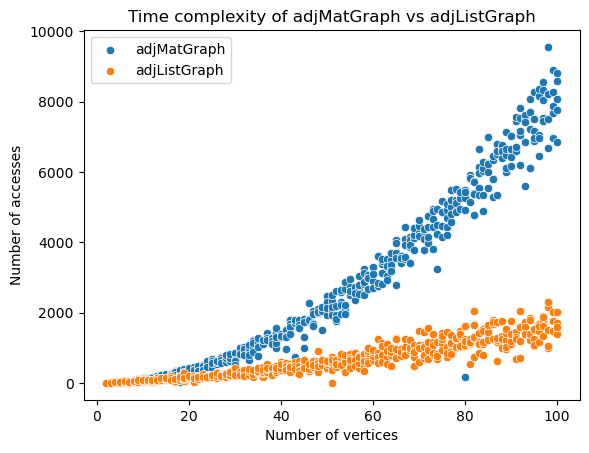

In [20]:
# Create DataFrames for listA and listB
dataA = {'A1': adjMatVerticesList, 'A2': adjMatAccessesList}
dataB = {'B1': adjListVerticesList, 'B2': adjListAccessesList}
dfA = pd.DataFrame(dataA)
dfB = pd.DataFrame(dataB)

# Create scatterplots for each DataFrame
sns.scatterplot(data=dfA, x='A1', y='A2', label='adjMatGraph')
sns.scatterplot(data=dfB, x='B1', y='B2', label='adjListGraph')

# Add labels, legend, and title
plt.xlabel('Number of vertices')
plt.ylabel('Number of accesses')
plt.legend()
plt.title('Time complexity of adjMatGraph vs adjListGraph')

plt.show()